In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Remove all empty files
folder_path = './raw_stations'
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and os.path.getsize(file_path) < 5: # Less than 5 bytes
        os.remove(file_path)
        print(f'Deleted: {file_path}')

In [3]:
station_files = sorted(glob.glob('./raw_stations/*.csv'))
station_files

['./raw_stations/70:ee:50:01:60:78.csv',
 './raw_stations/70:ee:50:01:cf:12.csv',
 './raw_stations/70:ee:50:04:ac:ea.csv',
 './raw_stations/70:ee:50:04:b4:36.csv',
 './raw_stations/70:ee:50:04:d3:de.csv',
 './raw_stations/70:ee:50:05:61:46.csv',
 './raw_stations/70:ee:50:17:c7:ee.csv',
 './raw_stations/70:ee:50:17:d3:1a.csv',
 './raw_stations/70:ee:50:19:9f:dc.csv',
 './raw_stations/70:ee:50:1c:43:78.csv',
 './raw_stations/70:ee:50:20:d1:2c.csv',
 './raw_stations/70:ee:50:28:9c:ec.csv',
 './raw_stations/70:ee:50:28:b2:92.csv',
 './raw_stations/70:ee:50:28:e2:26.csv',
 './raw_stations/70:ee:50:2b:4a:4a.csv',
 './raw_stations/70:ee:50:2b:58:c2.csv',
 './raw_stations/70:ee:50:2f:25:74.csv',
 './raw_stations/70:ee:50:33:41:34.csv',
 './raw_stations/70:ee:50:33:41:7a.csv',
 './raw_stations/70:ee:50:36:cf:1c.csv',
 './raw_stations/70:ee:50:37:00:ca.csv',
 './raw_stations/70:ee:50:37:11:4c.csv',
 './raw_stations/70:ee:50:3b:e9:d4.csv',
 './raw_stations/70:ee:50:3b:f5:64.csv',
 './raw_stations

In [4]:
#for csv_file in station_files:
df = pd.read_csv(station_files[0], delimiter=',')
df.head()

,date,time,temp
0,2023-05-31,21:00:17,21.9
1,2023-05-31,21:09:40,21.8
2,2023-05-31,21:19:55,21.3
3,2023-05-31,21:30:11,21.2
4,2023-05-31,21:40:26,20.9


In [5]:
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
df.head(10)

,date,time,temp
0,2023-05-31,2023-05-31 21:00:17,21.9
1,2023-05-31,2023-05-31 21:09:40,21.8
2,2023-05-31,2023-05-31 21:19:55,21.3
3,2023-05-31,2023-05-31 21:30:11,21.2
4,2023-05-31,2023-05-31 21:40:26,20.9
5,2023-05-31,2023-05-31 21:50:41,20.8
6,2023-05-31,2023-05-31 22:00:04,20.7
7,2023-05-31,2023-05-31 22:15:27,21.1
8,2023-05-31,2023-05-31 22:25:42,21.1
9,2023-05-31,2023-05-31 22:35:59,21.1


In [6]:
df['hour'] = df['time'].dt.hour
df.head(10)

,date,time,temp,hour
0,2023-05-31,2023-05-31 21:00:17,21.9,21
1,2023-05-31,2023-05-31 21:09:40,21.8,21
2,2023-05-31,2023-05-31 21:19:55,21.3,21
3,2023-05-31,2023-05-31 21:30:11,21.2,21
4,2023-05-31,2023-05-31 21:40:26,20.9,21
5,2023-05-31,2023-05-31 21:50:41,20.8,21
6,2023-05-31,2023-05-31 22:00:04,20.7,22
7,2023-05-31,2023-05-31 22:15:27,21.1,22
8,2023-05-31,2023-05-31 22:25:42,21.1,22
9,2023-05-31,2023-05-31 22:35:59,21.1,22


In [7]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

# Apply the function to each row in the dataframe
closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

# Convert the result back into a dataframe
result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]
result.head(10)

/tmp/ipykernel_120977/710818299.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


,date,time,temp
0,2023-05-31,2023-05-31 21:00:17,21.9
1,2023-05-31,2023-05-31 22:00:04,20.7
2,2023-05-31,2023-05-31 23:05:52,21.1
3,2023-06-01,2023-06-01 00:01:24,20.6
4,2023-06-01,2023-06-01 01:02:04,19.9
5,2023-06-01,2023-06-01 02:07:51,19.5
6,2023-06-01,2023-06-01 03:08:31,19.0
7,2023-06-01,2023-06-01 04:03:12,19.1
8,2023-06-01,2023-06-01 05:05:34,18.7
9,2023-06-01,2023-06-01 06:01:06,18.1


In [8]:
result['time'] = result['time'].dt.hour
result.head()

,date,time,temp
0,2023-05-31,21,21.9
1,2023-05-31,22,20.7
2,2023-05-31,23,21.1
3,2023-06-01,0,20.6
4,2023-06-01,1,19.9


In [9]:
# Filter by date interval
start_date = '2023-06-01'
end_date = '2023-08-31'

result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
result.head()

,date,time,temp
3,2023-06-01,0,20.6
4,2023-06-01,1,19.9
5,2023-06-01,2,19.5
6,2023-06-01,3,19.0
7,2023-06-01,4,19.1


In [10]:
result.tail()

,date,time,temp
2206,2023-08-31,19,28.0
2207,2023-08-31,20,26.9
2208,2023-08-31,21,26.0
2209,2023-08-31,22,25.2
2210,2023-08-31,23,24.4


## Preprocess all stations

In [11]:
all_dataframes = []

In [12]:
# For each hour, find the closest timestamp (either before or after)
def get_closest_hour(row, df):
    # Find all rows for the target hour and the next hour (or previous if needed)
    target_hour = row['hour']
    closest_row = df.iloc[(df['time'] - row['time']).abs().argmin()]
    return closest_row

for csv_file in station_files:
    print(f'Processing {csv_file}')
    df = pd.read_csv(csv_file, delimiter=',')
    df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
    df['hour'] = df['time'].dt.hour
    
    # Apply the function to each row in the dataframe
    closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))

    # Convert the result back into a dataframe
    result = closest_temps.reset_index(drop=True)[['date', 'time', 'temp']]

    # Get just the time
    result['time'] = result['time'].dt.hour
    
    # Filter by date interval
    start_date = '2023-06-01'
    end_date = '2023-08-31'
    result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]
    result['station'] = re.search(r"/([^/]+)\.csv$", csv_file).group(1)

    all_dataframes.append(result)

Processing ./raw_stations/70:ee:50:01:60:78.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:01:cf:12.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:04:ac:ea.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:04:b4:36.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:04:d3:de.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:05:61:46.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:17:c7:ee.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))
/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], 

Processing ./raw_stations/70:ee:50:17:d3:1a.csv
Processing ./raw_stations/70:ee:50:19:9f:dc.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:1c:43:78.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:20:d1:2c.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:28:9c:ec.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:28:b2:92.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:28:e2:26.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:2b:4a:4a.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:2b:58:c2.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:2f:25:74.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:33:41:34.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:33:41:7a.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:36:cf:1c.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:37:00:ca.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:37:11:4c.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:3b:e9:d4.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:3b:f5:64.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:3c:ee:4c.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:3d:23:92.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:3d:26:c8.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:3f:18:7e.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:3f:63:68.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:3f:68:bc.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:52:d9:cc.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:53:34:be.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:58:98:7c.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:5e:df:26.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:5f:09:04.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:5f:56:10.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:64:ff:ee.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:65:6b:86.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:65:86:d2.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:65:89:f2.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:6b:2a:9a.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:71:15:80.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:71:22:16.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:73:c5:a8.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:73:ce:d0.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:74:0d:90.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:74:29:4c.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:74:50:56.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:7a:6f:c6.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:7a:74:da.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:7a:8d:66.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:7a:8f:60.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:7a:ae:b2.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:7a:d1:ce.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:90:e1:86.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


Processing ./raw_stations/70:ee:50:a2:07:2e.csv


/tmp/ipykernel_120977/1812390815.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest_temps = df.groupby(['date', 'hour'], group_keys=False).apply(lambda group: get_closest_hour(group.iloc[0], group))


In [13]:
all_dataframes[0]

,date,time,temp,station
3,2023-06-01,0,20.6,70:ee:50:01:60:78
4,2023-06-01,1,19.9,70:ee:50:01:60:78
5,2023-06-01,2,19.5,70:ee:50:01:60:78
6,2023-06-01,3,19.0,70:ee:50:01:60:78
7,2023-06-01,4,19.1,70:ee:50:01:60:78
...,...,...,...,...
2206,2023-08-31,19,28.0,70:ee:50:01:60:78
2207,2023-08-31,20,26.9,70:ee:50:01:60:78
2208,2023-08-31,21,26.0,70:ee:50:01:60:78
2209,2023-08-31,22,25.2,70:ee:50:01:60:78


In [14]:
temperatures = pd.concat(all_dataframes, ignore_index=True)
temperatures.head()

,date,time,temp,station
0,2023-06-01,0,20.6,70:ee:50:01:60:78
1,2023-06-01,1,19.9,70:ee:50:01:60:78
2,2023-06-01,2,19.5,70:ee:50:01:60:78
3,2023-06-01,3,19.0,70:ee:50:01:60:78
4,2023-06-01,4,19.1,70:ee:50:01:60:78


In [15]:
temperatures.tail()

,date,time,temp,station
113675,2023-08-31,19,28.0,70:ee:50:a2:07:2e
113676,2023-08-31,20,25.9,70:ee:50:a2:07:2e
113677,2023-08-31,21,24.3,70:ee:50:a2:07:2e
113678,2023-08-31,22,23.1,70:ee:50:a2:07:2e
113679,2023-08-31,23,22.3,70:ee:50:a2:07:2e


In [16]:
temperatures.to_csv('temperatures.csv', index=False)

## Quality Control

Baseline defined in the paper "Citizen data for global mapping of atmospheric urban heat islands"

In [17]:
temperatures.shape

(113680, 4)

In [18]:
# Remove values below -20ºC and above 45ºC
temperatures = temperatures[(temperatures['temp'] >= -20) & (temperatures['temp'] <= 45)]
temperatures.shape

(113580, 4)

In [19]:
# Keep only rows where the temperature difference is within ±thresholdºC
threshold = 10
# Define a function to filter each station's data
def filter_station_data(station_df):
    station_df = station_df.copy()  # Avoid modifying the original dataframe
    station_df['temp_diff_prev'] = station_df['temp'].diff()
    station_df['temp_diff_next'] = station_df['temp'].diff(-1)
    
    # Keep only rows where the temperature difference is within ±thresholdºC
    filtered = station_df[(station_df['temp_diff_prev'].abs() <= threshold) & (station_df['temp_diff_next'].abs() <= threshold)]
    
    return filtered.drop(columns=["temp_diff_prev", "temp_diff_next"])

# Apply filtering per station
temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)
temperatures.shape

/tmp/ipykernel_120977/3283187688.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temperatures = temperatures.groupby("station", group_keys=False).apply(filter_station_data)


(113208, 4)

In [20]:
# Detect outliers checking the data distribution using z-score

# Group by date and time, then compute the mean and standard deviation of temp
grouped = temperatures.groupby(['date', 'time'])['temp'].agg(['mean', 'std'])

# Merge the mean and std back to the original dataframe
temperatures = temperatures.merge(grouped, on=['date', 'time'])

# Compute the Z-score
temperatures['z_score'] = (temperatures['temp'] - temperatures['mean']) / temperatures['std']

# Remove rows where the z-score value is outside the range between -2.32 and 1.64
temperatures = temperatures[(temperatures['z_score'].abs() >= -2.32) & ((temperatures['z_score'].abs() <= 1.64))]
temperatures.shape

(102481, 7)

In [21]:
# Remove unnecessary columns
temperatures = temperatures.drop(columns=['z_score', 'mean', 'std'])
temperatures

,date,time,temp,station
0,2023-06-01,1,19.9,70:ee:50:01:60:78
1,2023-06-01,2,19.5,70:ee:50:01:60:78
2,2023-06-01,3,19.0,70:ee:50:01:60:78
3,2023-06-01,4,19.1,70:ee:50:01:60:78
4,2023-06-01,5,18.7,70:ee:50:01:60:78
...,...,...,...,...
113203,2023-08-31,18,29.6,70:ee:50:a2:07:2e
113204,2023-08-31,19,28.0,70:ee:50:a2:07:2e
113205,2023-08-31,20,25.9,70:ee:50:a2:07:2e
113206,2023-08-31,21,24.3,70:ee:50:a2:07:2e


## Compute temperature differences

In [22]:
# As reference, we'll use 70:ee:50:3b:f5:64 (Venta del Olivar)

In [23]:
# Merge the dataframe with itself to compute the difference with the reference station
df_ref = temperatures[temperatures['station'] == '70:ee:50:2b:58:c2'][['date', 'time', 'temp']].rename(columns={'temp': 'temp_ref'})
df_merged = pd.merge(temperatures, df_ref, on=['date', 'time'])
df_merged

,date,time,temp,station,temp_ref
0,2023-06-01,1,19.9,70:ee:50:01:60:78,17.6
1,2023-06-01,2,19.5,70:ee:50:01:60:78,17.4
2,2023-06-01,3,19.0,70:ee:50:01:60:78,16.9
3,2023-06-01,4,19.1,70:ee:50:01:60:78,16.6
4,2023-06-01,5,18.7,70:ee:50:01:60:78,16.2
...,...,...,...,...,...
84213,2023-08-31,15,32.7,70:ee:50:a2:07:2e,30.1
84214,2023-08-31,16,32.4,70:ee:50:a2:07:2e,29.6
84215,2023-08-31,17,31.4,70:ee:50:a2:07:2e,29.1
84216,2023-08-31,18,29.6,70:ee:50:a2:07:2e,27.2


In [24]:
# Compute the daily temperature difference from reference station for each station
df_merged['temp_diff'] = df_merged['temp'] - df_merged['temp_ref']
df_merged

,date,time,temp,station,temp_ref,temp_diff
0,2023-06-01,1,19.9,70:ee:50:01:60:78,17.6,2.3
1,2023-06-01,2,19.5,70:ee:50:01:60:78,17.4,2.1
2,2023-06-01,3,19.0,70:ee:50:01:60:78,16.9,2.1
3,2023-06-01,4,19.1,70:ee:50:01:60:78,16.6,2.5
4,2023-06-01,5,18.7,70:ee:50:01:60:78,16.2,2.5
...,...,...,...,...,...,...
84213,2023-08-31,15,32.7,70:ee:50:a2:07:2e,30.1,2.6
84214,2023-08-31,16,32.4,70:ee:50:a2:07:2e,29.6,2.8
84215,2023-08-31,17,31.4,70:ee:50:a2:07:2e,29.1,2.3
84216,2023-08-31,18,29.6,70:ee:50:a2:07:2e,27.2,2.4


In [25]:
#threshold = 5
#df_filtered = df_merged[(df_merged['temp_diff'] >= -threshold) & (df_merged['temp_diff'] <= threshold)]
df_filtered = df_merged

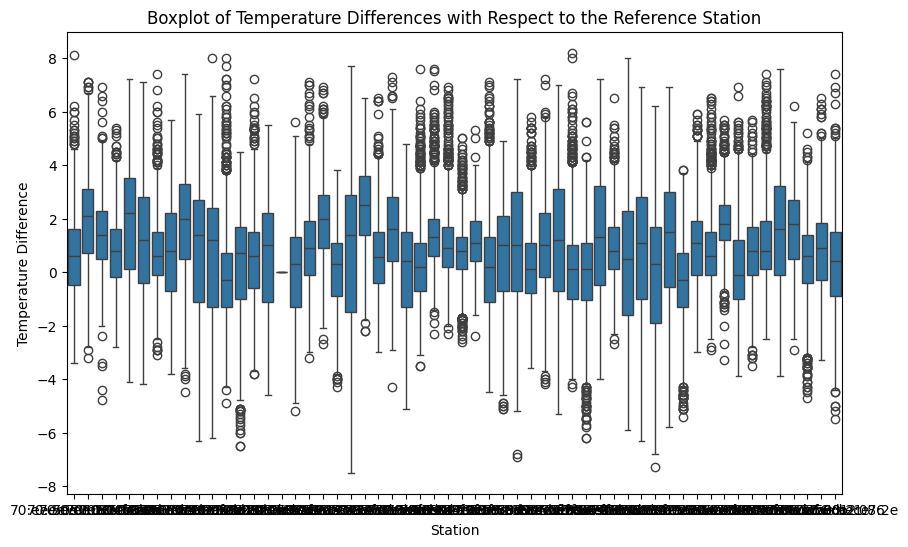

In [26]:
# Create a boxplot for each station showing the temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='temp_diff', data=df_filtered)

plt.title('Boxplot of Temperature Differences with Respect to the Reference Station')
plt.xlabel('Station')
plt.ylabel('Temperature Difference')

plt.show()

In [27]:
df_merged['temp'].max()

44.5

In [28]:
# Compute mean
df_filtered = df_filtered.groupby('station')['temp_diff'].mean().reset_index()
df_filtered

,station,temp_diff
0,70:ee:50:01:60:78,0.584053
1,70:ee:50:01:cf:12,1.875630
2,70:ee:50:04:ac:ea,1.354878
3,70:ee:50:04:b4:36,0.745168
4,70:ee:50:04:d3:de,1.745861
5,70:ee:50:05:61:46,1.196799
6,70:ee:50:17:c7:ee,0.728216
7,70:ee:50:17:d3:1a,0.617372
8,70:ee:50:19:9f:dc,1.840146
9,70:ee:50:1c:43:78,0.763222


## Add coordinates

In [29]:
stations = pd.read_csv('netatmo_stations.csv')
stations

,device_id,module_id,lon,lat
0,70:ee:50:7a:8d:66,02:00:00:7a:82:20,-0.748171,41.636124
1,70:ee:50:3f:63:68,02:00:00:3e:e0:04,-0.833446,41.671643
2,70:ee:50:3f:18:7e,02:00:00:3c:ec:c0,-0.774684,41.685630
3,70:ee:50:2b:58:c2,02:00:00:2a:db:82,-0.803851,41.712556
4,70:ee:50:36:cf:1c,02:00:00:37:03:a4,-0.797466,41.743163
...,...,...,...,...
65,70:ee:50:28:e1:6e,02:00:00:2b:27:92,-0.953483,41.580804
66,70:ee:50:5e:da:62,02:00:00:b2:bf:da,-0.952520,41.582089
67,70:ee:50:84:81:46,02:00:00:84:65:ca,-0.952520,41.582089
68,70:ee:50:7a:d1:ce,02:00:00:7a:fc:6e,-0.931340,41.589924


In [30]:
stations = stations.drop(columns=['module_id'])
stations

,device_id,lon,lat
0,70:ee:50:7a:8d:66,-0.748171,41.636124
1,70:ee:50:3f:63:68,-0.833446,41.671643
2,70:ee:50:3f:18:7e,-0.774684,41.685630
3,70:ee:50:2b:58:c2,-0.803851,41.712556
4,70:ee:50:36:cf:1c,-0.797466,41.743163
...,...,...,...
65,70:ee:50:28:e1:6e,-0.953483,41.580804
66,70:ee:50:5e:da:62,-0.952520,41.582089
67,70:ee:50:84:81:46,-0.952520,41.582089
68,70:ee:50:7a:d1:ce,-0.931340,41.589924


In [31]:
data = pd.merge(df_filtered, stations, left_on='station', right_on='device_id')
data.head()

,station,temp_diff,device_id,lon,lat
0,70:ee:50:01:60:78,0.584053,70:ee:50:01:60:78,-0.888513,41.676094
1,70:ee:50:01:cf:12,1.875630,70:ee:50:01:cf:12,-0.938232,41.625653
2,70:ee:50:04:ac:ea,1.354878,70:ee:50:04:ac:ea,-1.031000,41.725300
3,70:ee:50:04:b4:36,0.745168,70:ee:50:04:b4:36,-0.892489,41.677088
4,70:ee:50:04:d3:de,1.745861,70:ee:50:04:d3:de,-0.864463,41.663082


In [32]:
data = data.drop(columns=['device_id'])
data.head()

,station,temp_diff,lon,lat
0,70:ee:50:01:60:78,0.584053,-0.888513,41.676094
1,70:ee:50:01:cf:12,1.875630,-0.938232,41.625653
2,70:ee:50:04:ac:ea,1.354878,-1.031000,41.725300
3,70:ee:50:04:b4:36,0.745168,-0.892489,41.677088
4,70:ee:50:04:d3:de,1.745861,-0.864463,41.663082


In [33]:
data.to_csv('diff.csv', index=False)